In [1]:
import tensorflow as tf

x = tf.placeholder(tf.float32,name="input")

a = tf.Variable(tf.constant(5.,shape=[1]),name="a")
b = tf.Variable(tf.constant(6.,shape=[1]),name="b")
c = tf.Variable(tf.constant(10.,shape=[1]),name="c")
d = tf.Variable(tf.constant(2.,shape=[1]),name="d")

tensor1 = tf.multiply(a,b,"mul")
tensor2 = tf.subtract(tensor1,c,"sub")
tensor3 = tf.div(tensor2,d,"div")
result = tf.add(tensor3,x,"add")

inial = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(inial)
    print(sess.run(a))
    print(result)
    result = sess.run(result,feed_dict={x:1.0})
    print(result)
    constant_graph = tf.graph_util.convert_variables_to_constants(sess, sess.graph_def, ["add"])
    with tf.gfile.FastGFile("wsj.pb", mode='wb') as f:
        f.write(constant_graph.SerializeToString())
        

[ 5.]
Tensor("add:0", dtype=float32)
[ 11.]
INFO:tensorflow:Froze 4 variables.
Converted 4 variables to const ops.


In [2]:
import tensorflow as tf

with tf.gfile.FastGFile("wsj.pb", "rb") as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    result, x = tf.import_graph_def(graph_def,return_elements=["add:0", "input:0"])

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print(sess.run(a))
    result = sess.run(result, feed_dict={x: 5.0})
    print(result)

[ 5.]
[ 15.]


In [3]:
import tensorflow as tf
import os
from tensorflow.python.framework import graph_util
 
pb_file_path = os.getcwd()
 
with tf.Session(graph=tf.Graph()) as sess:
    x = tf.placeholder(tf.int32, name='x')
    y = tf.placeholder(tf.int32, name='y')
    b = tf.Variable(1, name='b')
    xy = tf.multiply(x, y)
    # 这里的输出需要加上name属性
    op = tf.add(xy, b, name='op_to_store')
 
    sess.run(tf.global_variables_initializer())
 
    # convert_variables_to_constants 需要指定output_node_names，list()，可以多个
    constant_graph = graph_util.convert_variables_to_constants(sess, sess.graph_def, ['op_to_store'])
 
    # 测试 OP
    feed_dict = {x: 10, y: 3}
    print(sess.run(op, feed_dict))
 
    # 写入序列化的 PB 文件
    with tf.gfile.FastGFile(pb_file_path+'\model.pb', mode='wb') as f:
        f.write(constant_graph.SerializeToString())


INFO:tensorflow:Froze 1 variables.
Converted 1 variables to const ops.
31


In [4]:
from tensorflow.python.platform import gfile
 
sess = tf.Session()
with gfile.FastGFile(pb_file_path+'model.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='') # 导入计算图
 
# 需要有一个初始化的过程    
sess.run(tf.global_variables_initializer())
 
# 需要先复原变量
print(sess.run('b:0'))
# 1
 
# 输入
input_x = sess.graph.get_tensor_by_name('x:0')
input_y = sess.graph.get_tensor_by_name('y:0')
 
op = sess.graph.get_tensor_by_name('op_to_store:0')
 
ret = sess.run(op,  feed_dict={input_x: 5, input_y: 5})
print(ret)
print(pb_file_path)


[ 6.]
26
D:\jupyter-file


In [5]:
import tensorflow as tf
import os
from tensorflow.python.framework import graph_util
 
pb_file_path = os.getcwd()
 
with tf.Session(graph=tf.Graph()) as sess:
    x = tf.placeholder(tf.int32, name='x')
    y = tf.placeholder(tf.int32, name='y')
    b = tf.Variable(1, name='b')
    xy = tf.multiply(x, y)
    # 这里的输出需要加上name属性
    op = tf.add(xy, b, name='op_to_store')
 
    sess.run(tf.global_variables_initializer())
 
    # convert_variables_to_constants 需要指定output_node_names，list()，可以多个
    constant_graph = graph_util.convert_variables_to_constants(sess, sess.graph_def, ['op_to_store'])
 
    # 测试 OP
    feed_dict = {x: 10, y: 3}
    print(sess.run(op, feed_dict))
 
    # 写入序列化的 PB 文件
    with tf.gfile.FastGFile(pb_file_path+'\model.pb', mode='wb') as f:
        f.write(constant_graph.SerializeToString())

INFO:tensorflow:Froze 1 variables.
Converted 1 variables to const ops.
31


In [6]:
from tensorflow.python.platform import gfile
 
sess = tf.Session()
with gfile.FastGFile(pb_file_path+'\model.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='') # 导入计算图
 
# 需要有一个初始化的过程    
sess.run(tf.global_variables_initializer())
 
# 需要先复原变量
print(sess.run('b:0'))
# 1
 
# 输入
input_x = sess.graph.get_tensor_by_name('x:0')
input_y = sess.graph.get_tensor_by_name('y:0')
 
op = sess.graph.get_tensor_by_name('op_to_store:0')
 
ret = sess.run(op,  feed_dict={input_x: 5, input_y: 5})
print(ret)
print(pb_file_path)


[ 6.]
26
D:\jupyter-file


In [11]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
from tensorflow.python.framework import graph_util
import os
import time
import numpy as np
#mnist下载地址
mnist = input_data.read_data_sets("./mnist_data/", one_hot=True)
x = tf.placeholder("float32", shape=[None, 784],name='x')
y_ = tf.placeholder("float32", shape=[None, 10],name='y_')


Extracting ./mnist_data/train-images-idx3-ubyte.gz


URLError: <urlopen error [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。>

Extracting ./mnist_data/train-images-idx3-ubyte.gz
Extracting ./mnist_data/train-labels-idx1-ubyte.gz
Extracting ./mnist_data/t10k-images-idx3-ubyte.gz
Extracting ./mnist_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use `tf.global_variables_initializer` instead.
step 0, training accuracy 0.04
time: 0.48413896560668945
********************************
step 100, training accuracy 0.9
time: 40.11776161193848
********************************
step 200, training accuracy 0.88
time: 40.48869228363037
********************************
step 300, training accuracy 0.94
time: 37.38708972930908
********************************
step 400, training accuracy 0.96
time: 38.065678119659424
********************************
step 500, training accuracy 0.92
time: 36.70241928100586
********************************
step 600, training accuracy 1
time: 37.647860050201416
********************************
step 700, training accuracy 0.96
time: 37.21524000167847
********************************
step 8

step 8600, training accuracy 1
time: 37.97379279136658
********************************
step 8700, training accuracy 1
time: 36.294731855392456
********************************
step 8800, training accuracy 0.98
time: 37.99897360801697
********************************
step 8900, training accuracy 1
time: 36.757694721221924
********************************
step 9000, training accuracy 1
time: 37.548259973526
********************************
step 9100, training accuracy 1
time: 36.59461736679077
********************************
step 9200, training accuracy 1
time: 37.254353761672974
********************************
step 9300, training accuracy 1
time: 37.28814244270325
********************************
step 9400, training accuracy 1
time: 36.136693239212036
********************************
step 9500, training accuracy 1
time: 37.55280804634094
********************************
step 9600, training accuracy 1
time: 36.309213161468506
********************************
step 9700, training accura

step 17800, training accuracy 1
time: 40.33160877227783
********************************
step 17900, training accuracy 1
time: 41.15782856941223
********************************
step 18000, training accuracy 1
time: 40.65656590461731
********************************
step 18100, training accuracy 1
time: 43.20710825920105
********************************
step 18200, training accuracy 1
time: 42.400583267211914
********************************
step 18300, training accuracy 1
time: 42.42579102516174
********************************
step 18400, training accuracy 1
time: 41.62155866622925
********************************
step 18500, training accuracy 1
time: 42.72540473937988
********************************
step 18600, training accuracy 1
time: 42.03373074531555
********************************
step 18700, training accuracy 1
time: 42.143657207489014
********************************
step 18800, training accuracy 1
time: 42.57112717628479
********************************
step 18900, trainin

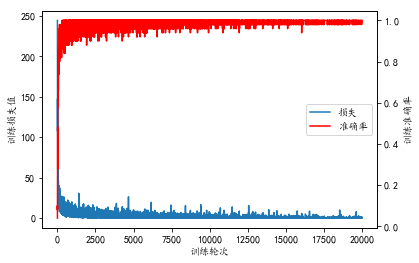

INFO:tensorflow:Froze 8 variables.
Converted 8 variables to const ops.


In [15]:
import tensorflow as tf
from tensorflow.python.framework import graph_util
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("./mnist_data/",one_hot=True)
#定义网络流
sess = tf.InteractiveSession()
#定义网络的输入输出节点，这里要注意节点的名称，一定要和Android程序中的一致
x = tf.placeholder("float32", shape=[None, 784],name='x')
y_ = tf.placeholder("float32", shape=[None, 10],name='y_')
#权重初始化
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)
#偏差初始化
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)
#定义2D卷积运算
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding="SAME")
#定义池化层，采用常用的最大池化
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
#开始进行网络的构建
##第一层
W_conv1 = weight_variable([5,5,1,32])
b_conv1 = bias_variable([32])
#图片格式的更改，由一维变为二维数据
x_image = tf.reshape(x, [-1,28,28,1])
#卷积处理
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
#池化
h_pool1 = max_pool_2x2(h_conv1)
##第二层
W_conv2 = weight_variable([5,5,32,64])
b_conv2 = weight_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)
#第三层, 全连接层
#这层是拥有1024个神经元的全连接层
#W的第1维size为7*7*64，7*7是h_pool2输出的size，64是第2层输出神经元个数
W_fc1 = weight_variable([7*7*64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
keep_prob = tf.placeholder("float32",name='keep_prob')
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
#softmax层
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2,name="y_conv")
y_conv2=tf.nn.softmax(tf.matmul(h_fc1, W_fc2) + b_fc2,name="y_conv2")

#定义损失函数和优化器
cross_entropy = -tf.reduce_sum(y_ * tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_predict = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_predict, "float32"))

#开始模型生成
sess.run(tf.initialize_all_variables())
#为了后续绘制准确率和损失图的绘制，预先定义两个数组
fig_loss = np.zeros([20000])
fig_accuracy = np.zeros([20000])
#为了计量每轮训练时间，初始化一个时间
start_time = time.time()

#开始训练模型，循环20000次，每次随机从训练集中抓取50幅图像
for i in range(20000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g" % (i, train_accuracy))
        end_time = time.time()
        print("time:", (end_time - start_time))
        start_time = end_time
        print("********************************")
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
    fig_loss[i] = sess.run(cross_entropy, feed_dict={x: batch[0], y_: batch[1],keep_prob: 1.0})
    fig_accuracy[i] = sess.run(accuracy, feed_dict={x: batch[0], y_: batch[1],keep_prob: 1.0})

#绘制曲线
#解决中文显示问题
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
lns1 = ax1.plot(np.arange(20000), fig_loss, label="Loss")
# 按一定间隔显示实现方法
# ax2.plot(200 * np.arange(len(fig_accuracy)), fig_accuracy, 'r')
lns2 = ax2.plot(np.arange(20000), fig_accuracy, 'r', label="Accuracy")
ax1.set_xlabel('训练轮次')
ax1.set_ylabel('训练损失值')
ax2.set_ylabel('训练准确率')
# 合并图例
lns = lns1 + lns2
labels = ["损失", "准确率"]
# labels = [l.get_label() for l in lns]
plt.legend(lns, labels, loc=7)
plt.show()

#保存为pb文件
constant_graph = graph_util.convert_variables_to_constants(sess, sess.graph_def,["y_conv2"])
with tf.gfile.FastGFile('grf.pb', mode='wb') as f:
    f.write(constant_graph.SerializeToString())
